# Examples of reading data from the TIGRESS simulations - RAD datasets

**Welcome to the TIGRESS data release!**

This script focus on reading and analysing the UV radiation post-processing dataset presented in [Kado-Fong et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020ApJ...897..143K/abstract).

In [5]:
%load_ext autoreload
%autoreload 2

In [16]:
import sys
sys.path.insert(0, "../module/") #add path for import
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import tigress_read #scripts for reading data
import yt #https://yt-project.org/

## Examining the simulation model information

In [2]:
#master directory of where the data is stored
#dir_master = "../data/" #this is default
dir_master = "/tigress/munan/public_html/astro-tigress/"
model_id = "R8_4pc" #name of the simulation model

First, we can look into what snapshots are available, and what types of datasets they contain.

Each snapshot has an "ivtk" number. This is the Athena4.2 VTK output id. 

The time for each snapshot is ivtk*dt_Myr, where dt_Myr is the output interval per vtk number in Myr.

For the "R8_2pc" simulation, we release the data in the time frame when the simulation has already reached a steady state. The data release time interval is about 10 Myr.

In [9]:
model = tigress_read.Model(model_id, dir_master=dir_master) #reading the model information
print("Snapshots and contained data sets:")
for ivtk in model.ivtks:
    print("ivtk={:d}, t={:.1f} Myr, datasets={}".format(ivtk, ivtk*model.dt_Myr, model.data_sets[ivtk]))

Snapshots and contained data sets:
ivtk=200, t=195.6 Myr, datasets=['MHD', 'MHD_PI']
ivtk=210, t=205.3 Myr, datasets=['MHD', 'MHD_PI']
ivtk=220, t=215.1 Myr, datasets=['MHD', 'MHD_PI']
ivtk=230, t=224.9 Myr, datasets=['MHD', 'MHD_PI']
ivtk=240, t=234.7 Myr, datasets=['MHD', 'MHD_PI']
ivtk=250, t=244.4 Myr, datasets=['MHD', 'MHD_PI']
ivtk=260, t=254.2 Myr, datasets=['MHD', 'MHD_PI']
ivtk=270, t=264.0 Myr, datasets=['MHD', 'MHD_PI']
ivtk=280, t=273.8 Myr, datasets=['MHD', 'MHD_PI']
ivtk=290, t=283.6 Myr, datasets=['MHD', 'MHD_PI']
ivtk=300, t=293.3 Myr, datasets=['MHD', 'MHD_PI']
ivtk=310, t=303.1 Myr, datasets=['MHD', 'MHD_PI']
ivtk=320, t=312.9 Myr, datasets=['MHD', 'MHD_PI']
ivtk=330, t=322.7 Myr, datasets=['MHD', 'MHD_PI']
ivtk=340, t=332.4 Myr, datasets=['MHD', 'MHD_PI']
ivtk=350, t=342.2 Myr, datasets=['MHD', 'MHD_PI']
ivtk=360, t=352.0 Myr, datasets=['MHD', 'MHD_PI']
ivtk=370, t=361.8 Myr, datasets=['MHD', 'MHD_PI']
ivtk=380, t=371.6 Myr, datasets=['MHD', 'MHD_PI']
ivtk=390, t=381

## Read and analyze the 3D UV radiation post-processing output

Now, we want to look into the detailed 3D simulation data of the simulations. First, we select a snapshot (identified by its ivtk number) and the type of dataset we want to look into ("rad" in this case). Then we need to load the data. Because the data files are large, it can take a while to load.

In [10]:
#load the UV data set for the snapshot ivtk=300
model.load(300, dataset="MHD_PI")

Additional fields you have from UV post-processed data are 
* `rad_energy_density0` -- EUV radiation energy density
* `rad_energy_density1` -- FUV radiation energy density
* `rad_flux0_x/y/z` -- EUV radiation flux vector
* `rad_flux1_x/y/z` -- FUV radiation flux vector
* `specific_scalar[0]` -- electron fraction

Our yt wrapper adds 
* `Erad_FUV` and `Erad_EUV`
* `xe` and `ne`

In [12]:
model.MHD_PI.ytds.field_list

[('athena', 'cell_centered_B_x'),
 ('athena', 'cell_centered_B_y'),
 ('athena', 'cell_centered_B_z'),
 ('athena', 'density'),
 ('athena', 'pressure'),
 ('athena', 'specific_scalar[0]'),
 ('athena', 'velocity_x'),
 ('athena', 'velocity_y'),
 ('athena', 'velocity_z')]


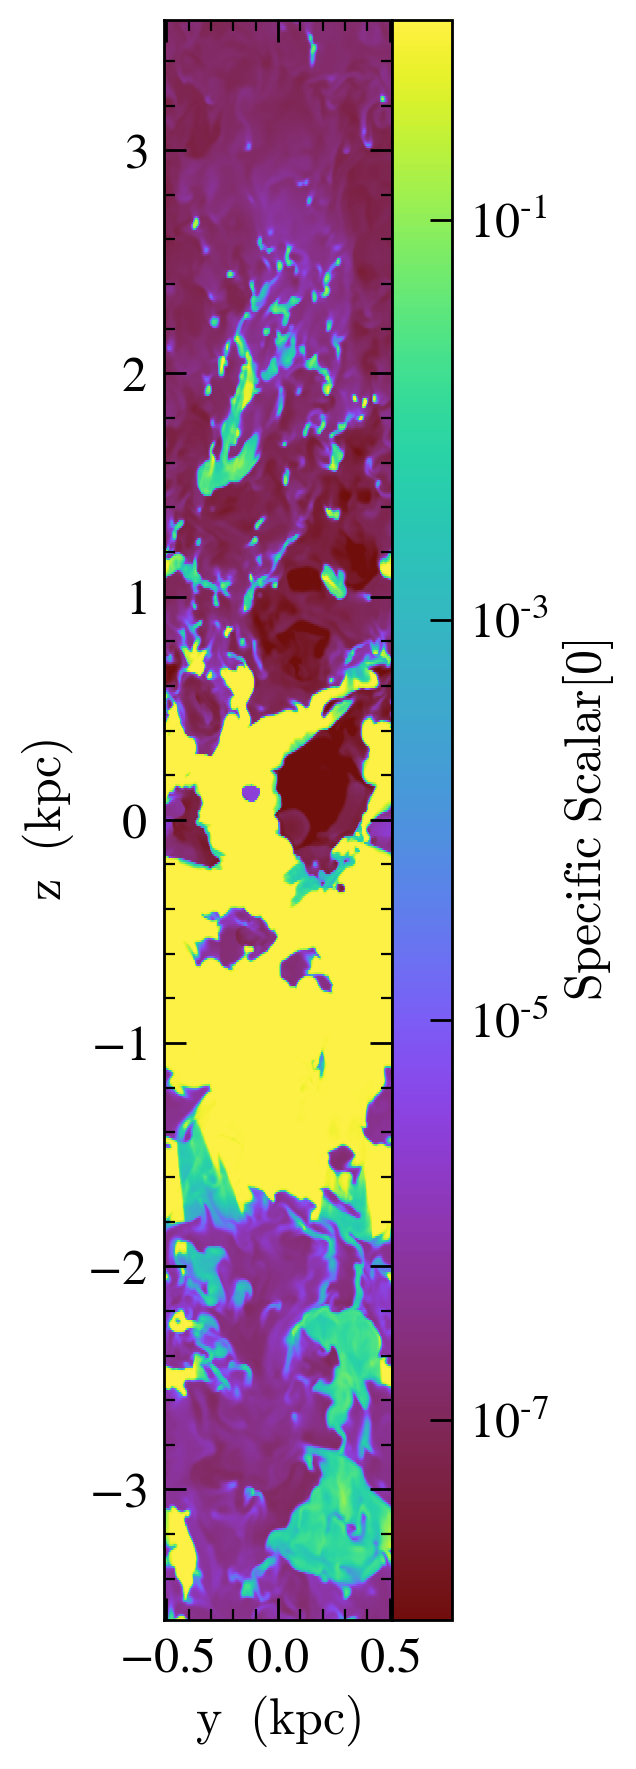

In [15]:
yt.SlicePlot(model.MHD_PI.ytds, "x", fields=["specific_scalar[0]"])

### Use YT to analyse data

The "ytds" member is the standard yt data object. You can use all the standard YT function to plot and analyse the data.

Below is midplane slices of electron fraction, electron number density, and radiation energy densities.


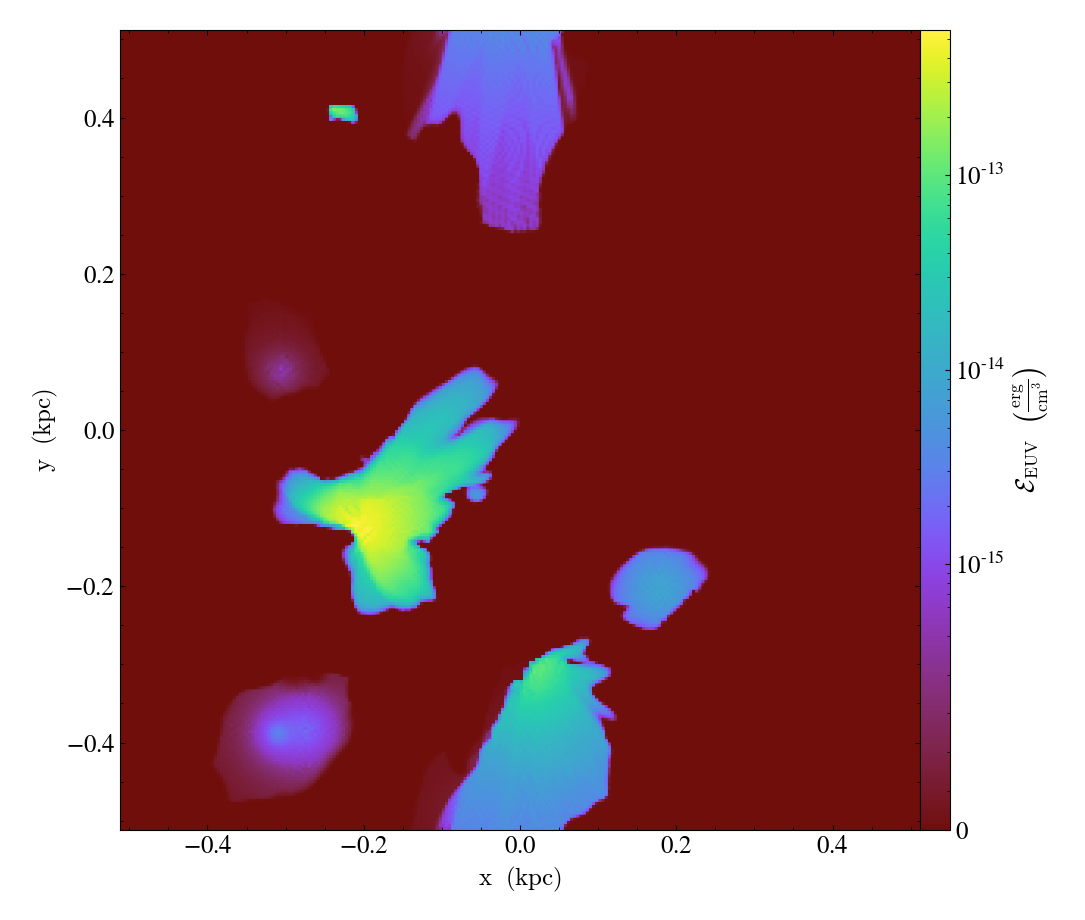
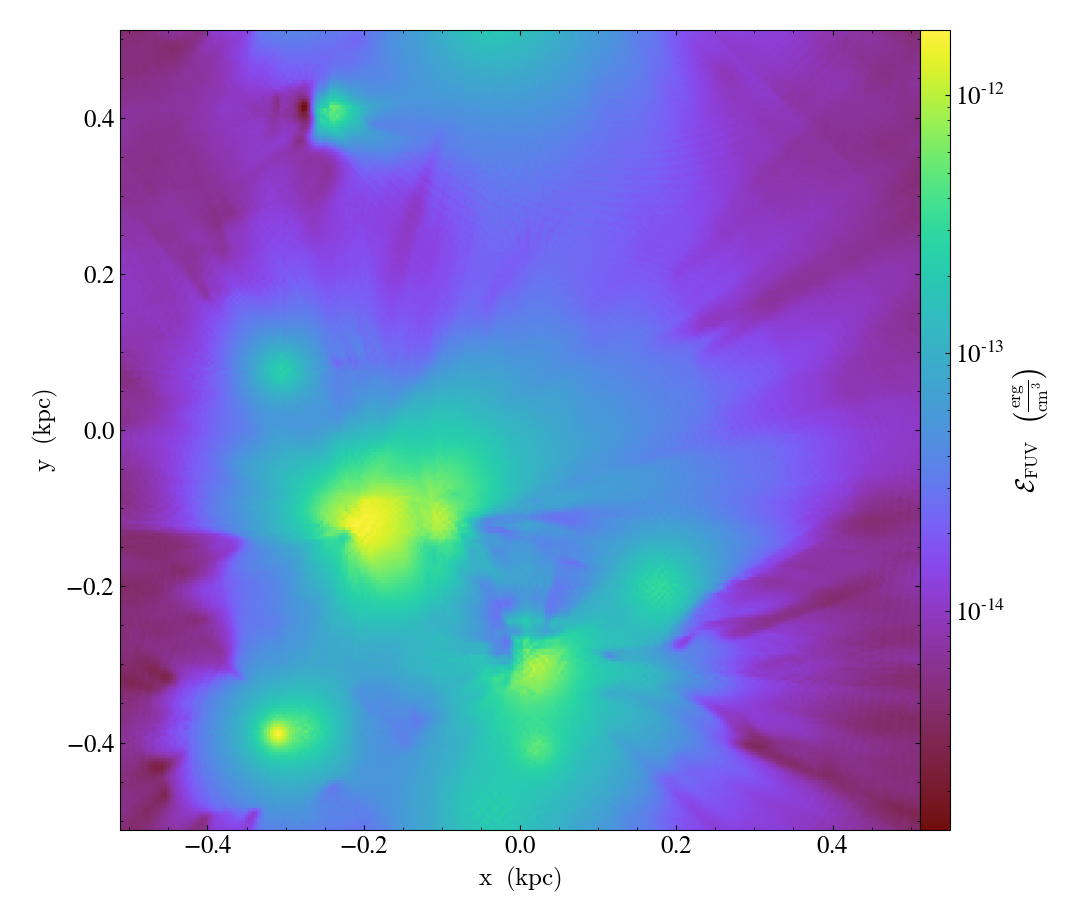
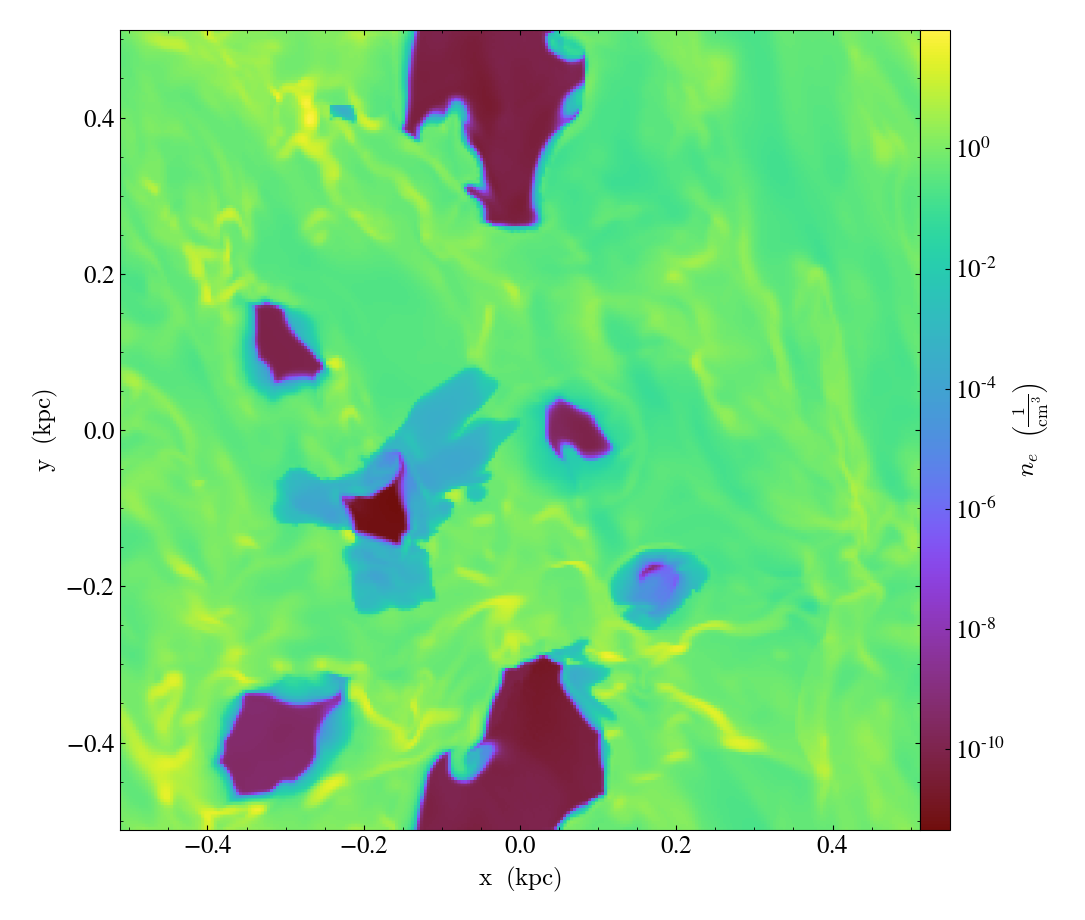
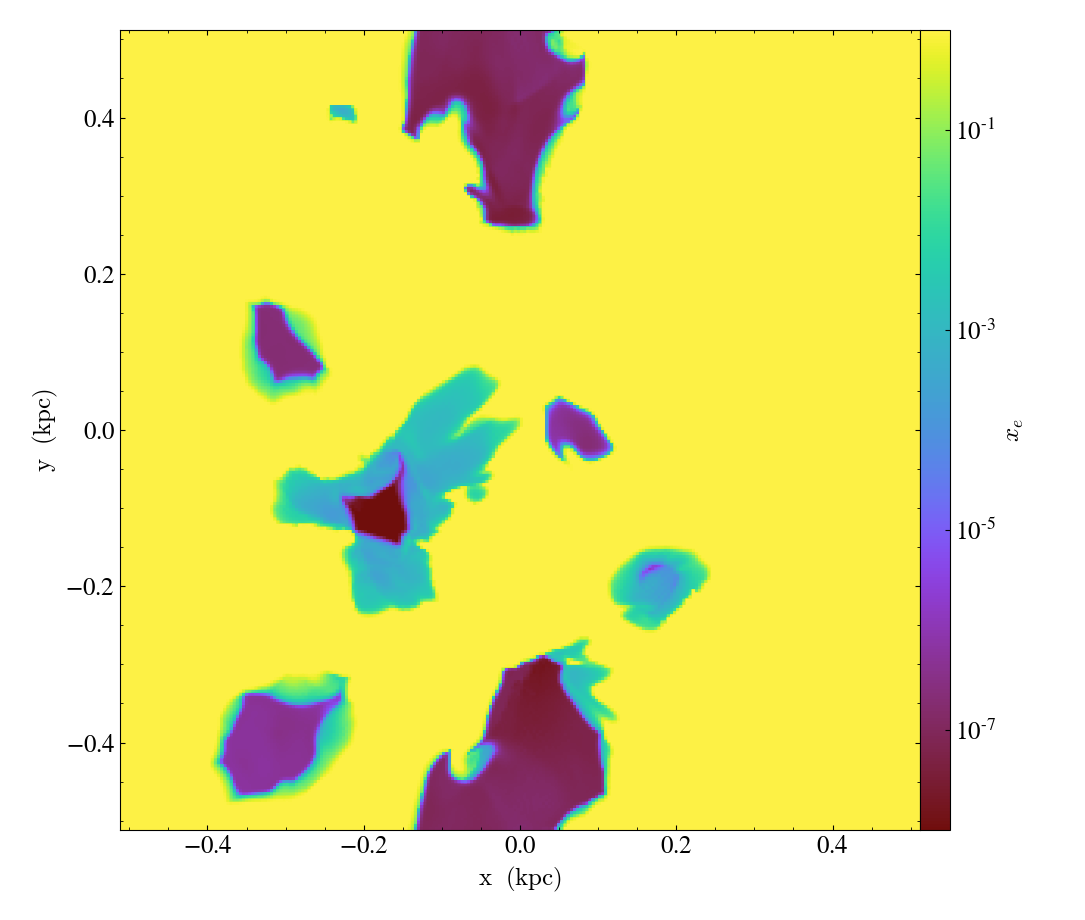

In [8]:
yt.SlicePlot(model.rad.ytds, "z", fields=["xe","ne","Erad_FUV","Erad_EUV"])